# 城市气候与海洋的关系研究

导入包

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
import glob,os

In [62]:
file=glob.glob("./*.csv")
file

['.\\asti_150715.csv',
 '.\\asti_250715.csv',
 '.\\asti_270615.csv',
 '.\\bologna_150715.csv',
 '.\\bologna_250715.csv',
 '.\\bologna_270615.csv',
 '.\\cesena_150715.csv',
 '.\\cesena_250715.csv',
 '.\\cesena_270615.csv',
 '.\\faenza_150715.csv',
 '.\\faenza_250715.csv',
 '.\\faenza_270615.csv',
 '.\\ferrara_150715.csv',
 '.\\ferrara_250715.csv',
 '.\\ferrara_270615.csv',
 '.\\mantova_150715.csv',
 '.\\mantova_250715.csv',
 '.\\mantova_270615.csv',
 '.\\milano_150715.csv',
 '.\\milano_250715.csv',
 '.\\milano_270615.csv',
 '.\\piacenza_150715.csv',
 '.\\piacenza_250715.csv',
 '.\\piacenza_270615.csv',
 '.\\ravenna_150715.csv',
 '.\\ravenna_250715.csv',
 '.\\ravenna_270615.csv',
 '.\\torino_150715.csv',
 '.\\torino_250715.csv',
 '.\\torino_270615.csv']

In [63]:
dl= []
for f in file:
    dl.append(pd.read_csv(f))   
df = pd.concat(dl)
df

Unnamed: 0   temp  humidity  pressure       description          dt  \
0            0  28.05        66    1014.0      Sky is Clear  1436863176   
1            1  29.51        64    1014.0      Sky is Clear  1436866759   
2            2  30.39        58    1017.0      Sky is Clear  1436870510   
3            3  31.10        54    1017.0      Sky is Clear  1436874098   
4            4  33.23        45    1016.0        few clouds  1436877645   
5            5  32.95        46    1016.0        few clouds  1436881329   
6            6  34.31        46    1015.0        few clouds  1436884929   
7            7  32.47        49    1015.0        few clouds  1436888513   
8            8  34.28        46    1015.0        few clouds  1436892132   
9            9  31.41        46    1014.0      Sky is Clear  1436895723   
10          10  29.72        58    1014.0      Sky is Clear  1436899336   
11          11  27.68        62    1015.0      Sky is Clear  1436902943   
12          12  26.44        69    1015.0      Sky is Clear  1436906532   
13          13  26.17        69    1016.0      Sky is Clear  1436910149   
14          14  25.21        78    1014.0      Sky is Clear  1436913739   
15          15  24.45        73    1016.0      Sky is Clear  1436917311   
16          16  24.32        73    1016.0      Sky is Clear  1436920931   
17          17  24.24        73    1016.0      Sky is Clear  1436924426   
18          18  24.00        73    1016.0      Sky is Clear  1436928078   
19          19  23.00        83    1017.0     broken clouds  1436931718   
20          20  23.00        78    1017.0  scattered clouds  1436935298   
21          21  25.00        73    1017.0        few clouds  1436938882   
22          22  27.00        65    1017.0        few clouds  1436942516   
23          23  27.00        65    1017.0      Sky is Clear  1436945951   
0            0  28.79        54    1012.0      Sky is Clear  1437730850   
1            1  30.02        58    1012.0      Sky is Clear  1437734493   
2            2  30.79        49    1007.0        light rain  1437738045   
3            3  32.02        51    1011.0        few clouds  1437741579   
4            4  30.93        51    1011.0        few clouds  1437745188   
5            5  29.12        48    1009.0        light rain  1437748777   
..         ...    ...       ...       ...               ...         ...   
14          14  21.75        64    1009.0     broken clouds  1437781191   
15          15  23.01        64    1009.0      Sky is Clear  1437784762   
16          16  22.39        64    1009.0        light rain  1437788332   
17          17  21.50        73    1009.0  scattered clouds  1437791949   
18          18  21.84        83    1009.0  scattered clouds  1437795572   
19          19  21.84        77    1009.0     broken clouds  1437799177   
20          20  21.50        88    1010.0     broken clouds  1437802719   
21          21  23.54        78    1010.0      Sky is Clear  1437806353   
22          22  25.72        64    1010.0      Sky is Clear  1437809920   
23          23  25.84        64    1010.0      Sky is Clear  1437813560   
0            0  23.80        64    1019.0      Sky is Clear  1435387651   
1            1  24.68        60    1018.0      Sky is Clear  1435390804   
2            2  25.12        60    1018.0      Sky is Clear  1435394206   
3            3  25.54        60    1018.0      Sky is Clear  1435398681   
4            4  27.42        57    1017.0      Sky is Clear  1435402112   
5            5  28.97        47    1017.0      Sky is Clear  1435405743   
6            6  29.36        45    1017.0      Sky is Clear  1435409402   
7            7  30.56        45    1015.0      Sky is Clear  1435416605   
8            8  31.04        48    1015.0      Sky is Clear  1435420220   
9            9  31.32        48    1014.0      Sky is Clear  1435423957   
10          10  30.69        48    1014.0      Sky is Clear  1435427586   
11          11  25.15        

查看行数

In [64]:
df.shape[0]

675

去除没用的列

In [65]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head(3)

temp  humidity  pressure   description          dt  wind_speed  wind_deg  \
0  28.05        66    1014.0  Sky is Clear  1436863176        2.57    42.501   
1  29.51        64    1014.0  Sky is Clear  1436866759        1.54   263.000   
2  30.39        58    1017.0  Sky is Clear  1436870510        2.60   100.000   

   city                  day  dist  
0  Asti  2015-07-14 10:39:36   315  
1  Asti  2015-07-14 11:39:19   315  
2  Asti  2015-07-14 12:41:50   315

各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [123]:
distance = df.groupby('city')[['dist']].max()
tem_max = df.groupby('city')[['temp']].max()
tem_min = df.groupby('city')[['temp']].min()
hum_max = df.groupby('city')[['humidity']].max()
hum_min = df.groupby('city')[['humidity']].min()

In [77]:
tem_max.columns=['tem_max']
tem_min.columns=['tem_min']
hum_max.columns=['hum_max']
hum_min.columns=['hum_min']

In [78]:
df1 = pd.concat([distance,tem_max,tem_min,hum_max,hum_min],axis=1)
df1

dist  tem_max  tem_min  hum_max  hum_min
city                                              
Asti       315    34.31    18.01       93       29
Bologna     71    33.85    18.44       92       40
Cesena      14    32.81    18.41      100       61
Faenza      37    32.74    18.62      100       61
Ferrara     47    33.43    18.81       85       39
Mantova    121    34.18    19.03      100       28
Milano     250    34.81    18.28      100       35
Piacenza   200    33.92    18.68      100       35
Ravenna      8    32.79    18.22       94       34
Torino     357    34.69    18.94       88       45

显示最高温度与离海远近的关系

Text(0,1,'tem_max')

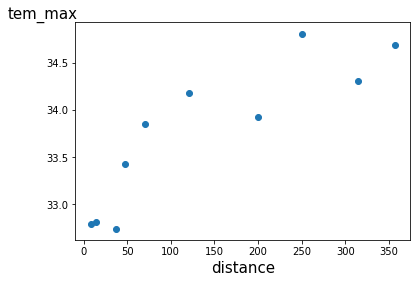

In [70]:
plt.scatter(distance,tem_max)
xlabel = plt.xlabel('distance')
xlabel.set_fontsize(15)
plt.ylabel('tem_max',fontdict=dict(fontsize=15),rotation=0,position=(0,1))

离海距离和最高温度大致呈正相关的关系

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [87]:
cond = distance>50
cond

city
Asti         True
Bologna      True
Cesena      False
Faenza      False
Ferrara     False
Mantova      True
Milano       True
Piacenza     True
Ravenna     False
Torino       True
Name: dist, dtype: bool

In [127]:
dist_far = distance[cond]
dist_far= np.array(dist_far)
dist_far.ravel()

array([315,  71, 121, 250, 200, 357], dtype=int64)

In [96]:
temp_far = tem_max[cond]
temp_far= np.array(temp_far)
temp_far.ravel()

array([34.31, 33.85, 34.18, 34.81, 33.92, 34.69])

In [102]:
dist_near = distance[distance<100]
dist_near= np.array(dist_near)
dist_near.ravel()

array([71, 14, 37, 47,  8], dtype=int64)

In [105]:
temp_near = tem_max[distance < 100]
temp_near = np.array(temp_near)
temp_near.ravel()

array([33.85, 32.81, 32.74, 33.43, 32.79])

使用支持向量机计算回归参数

In [22]:
!pip install sklearn -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple
  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\76111\AppData\Local\pip\Cache\wheels\82\7b\c8\524bffad1af0af5d23d9bbc9444ed8ccf5fed065a49d479d55
Successfully built sklearn


You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [106]:
from sklearn.svm import SVR

In [ ]:
support vector machine

In [ ]:
r = regressor

In [113]:
# 创建算法
svr_near = SVR(kernel='linear')
svr_near.fit(dist_near.reshape(-1,1),temp_near.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [114]:
# 预测
x_test_near = np.linspace(0, 100, 100).reshape(-1,1)
y_near = svr_near.predict(x_test_near)
y_near

array([32.55539683, 32.57239218, 32.58938753, 32.60638288, 32.62337823,
       32.64037358, 32.65736893, 32.67436428, 32.69135963, 32.70835498,
       32.72535033, 32.74234568, 32.75934103, 32.77633638, 32.79333173,
       32.81032708, 32.82732243, 32.84431778, 32.86131313, 32.87830848,
       32.89530383, 32.91229918, 32.92929453, 32.94628988, 32.96328523,
       32.98028058, 32.99727593, 33.01427128, 33.03126663, 33.04826198,
       33.06525734, 33.08225269, 33.09924804, 33.11624339, 33.13323874,
       33.15023409, 33.16722944, 33.18422479, 33.20122014, 33.21821549,
       33.23521084, 33.25220619, 33.26920154, 33.28619689, 33.30319224,
       33.32018759, 33.33718294, 33.35417829, 33.37117364, 33.38816899,
       33.40516434, 33.42215969, 33.43915504, 33.45615039, 33.47314574,
       33.49014109, 33.50713644, 33.52413179, 33.54112714, 33.55812249,
       33.57511785, 33.5921132 , 33.60910855, 33.6261039 , 33.64309925,
       33.6600946 , 33.67708995, 33.6940853 , 33.71108065, 33.72

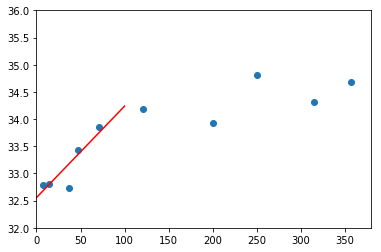

In [118]:
plt.scatter(distance,tem_max)
# plt.axis()
plt.axis((0,380,32,36))
plt.plot(x_test_near, y_near,c='r')

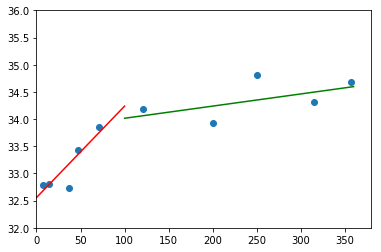

In [131]:
svr_far = SVR(kernel='linear')
svr_far.fit(dist_far.reshape(-1,1), temp_far.ravel())
x_test_far = np.linspace(100,360,100).reshape(-1,1)
y_far = svr_far.predict(x_test_far)
plt.scatter(distance,tem_max)
plt.axis((0, 380, 32, 36))
plt.plot(x_test_near, y_near, c='r')
plt.plot(x_test_far, y_far, c='g')

查看最低温度与海洋距离的关系

In [54]:
df2.head(3)

dist  tem_max  tem_min  hum_max  hum_min
city                                             
Asti      315    34.31    18.01       93       29
Bologna    71    33.85    18.44       92       40
Cesena     14    32.81    18.41      100       61

Text(0,1,'tem_min')

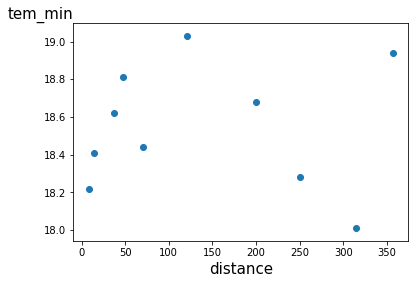

In [22]:
plt.scatter(distance,tem_min)
plt.xlabel('distance',fontdict=dict(fontsize=15))
plt.ylabel('tem_min',fontdict=dict(fontsize=15),rotation=0,position=(0,1))

最低湿度与海洋距离的关系

Text(0,1,'hum_min')

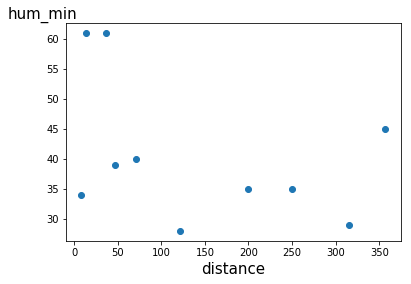

In [23]:
plt.scatter(distance,hum_min)
plt.xlabel('distance',fontdict=dict(fontsize=15))
plt.ylabel('hum_min',fontdict=dict(fontsize=15),rotation=0,position=(0,1))

最高湿度与海洋距离的关系

Text(0,1,'hum_max')

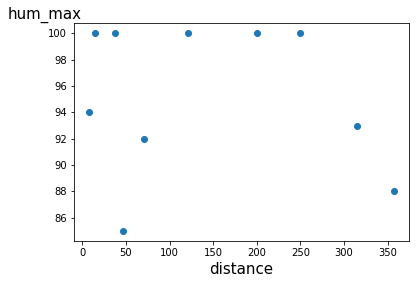

In [25]:
plt.scatter(distance,hum_max)
plt.xlabel('distance',fontdict=dict(fontsize=15))
plt.ylabel('hum_max',fontdict=dict(fontsize=15),rotation=0,position=(0,1))

平均湿度与海洋距离的关系

In [28]:
hum_avg = df.groupby('city')['humidity'].mean()
hum_avg.name = 'hum_avg'
df2 = pd.concat([hum_avg,df2],axis=1)
df2

hum_avg  dist  tem_max  tem_min  hum_max  hum_min
city                                                         
Asti      63.132353   315    34.31    18.01       93       29
Bologna   61.338235    71    33.85    18.44       92       40
Cesena    77.647059    14    32.81    18.41      100       61
Faenza    81.074627    37    32.74    18.62      100       61
Ferrara   61.308824    47    33.43    18.81       85       39
Mantova   59.147059   121    34.18    19.03      100       28
Milano    56.984848   250    34.81    18.28      100       35
Piacenza  59.308824   200    33.92    18.68      100       35
Ravenna   68.015152     8    32.79    18.22       94       34
Torino    63.191176   357    34.69    18.94       88       45

Text(0,1,'hum_avg')

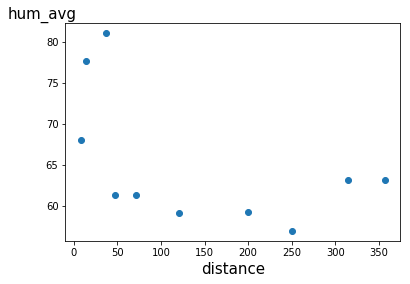

In [30]:
plt.scatter(distance,hum_avg)
plt.xlabel('distance',fontdict=dict(fontsize=15))
plt.ylabel('hum_avg',fontdict=dict(fontsize=15),rotation=0,position=(0,1))

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风向与风速的关系

Text(0,1,'wind_speed')

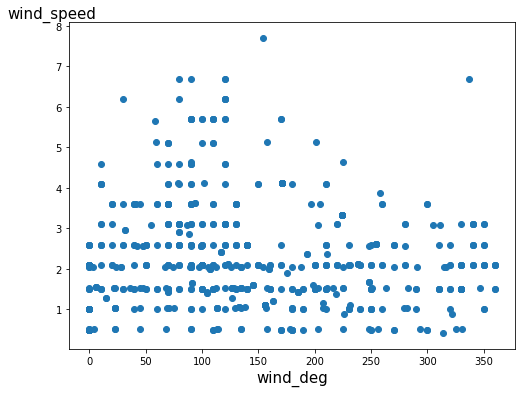

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['wind_deg'],df['wind_speed'])
plt.xlabel('wind_deg',fontdict=dict(fontsize=15))
plt.ylabel('wind_speed',fontdict=dict(fontsize=15),rotation=0,position=(0,1))

在子图中，同时比较风向与湿度和风力的关系

Text(0.5,1,'风向和湿度的关系')

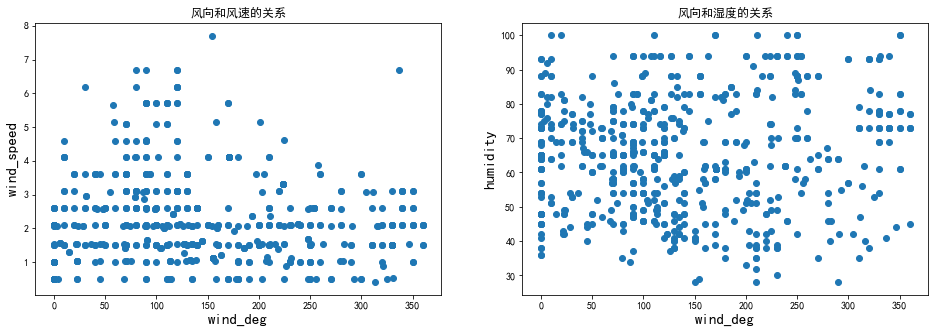

In [132]:
plt.figure(figsize=(8*2,5))
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

scatter1 = plt.subplot(1,2,1)
scatter1.scatter(df['wind_deg'],df['wind_speed'])
scatter1.set_xlabel('wind_deg',fontdict=dict(fontsize=15))
scatter1.set_ylabel('wind_speed',fontdict=dict(fontsize=15))
scatter1.set_title('风向和风速的关系')

scatter2 = plt.subplot(1,2,2)
scatter2.scatter(df['wind_deg'],df['humidity'])
scatter2.set_xlabel('wind_deg',fontdict=dict(fontsize=15))
scatter2.set_ylabel('humidity',fontdict=dict(fontsize=15))
scatter2.set_title('风向和湿度的关系')


# scatter3 = plt.subplot(1,3,3)
# scatter3.scatter(df['wind_deg'],df[''])

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

In [140]:
wind_deg = df['wind_deg'].values
wind_deg

array([ 42.501  , 263.     , 100.     ,  90.     , 120.     , 110.     ,
       100.     , 100.     , 100.     , 240.     ,  70.     ,  40.     ,
        30.     , 330.     ,   0.     , 350.     , 340.     , 360.     ,
       310.     ,   0.     , 350.     , 330.     ,   0.     ,  50.     ,
        70.     ,  70.     ,  24.     ,  10.     , 120.     ,   0.     ,
       170.     ,   0.     ,   0.     , 180.     , 270.     , 300.     ,
         0.     ,  90.     ,  10.     , 280.     , 290.     ,   0.     ,
       350.     , 330.     ,   0.     ,   0.     ,   0.     ,   0.     ,
        80.     ,  50.     , 100.     ,  70.     , 154.505  ,  50.     ,
         0.     , 140.     ,  50.     , 100.     ,  10.     , 340.     ,
       320.     , 340.     , 360.     ,  30.     , 360.     , 321.501  ,
         0.     ,   0.     ,  90.     , 157.     ,  67.     ,  90.     ,
       135.     ,  22.     , 337.     ,   0.     , 112.     ,  90.     ,
       112.     , 128.     ,  91.004  ,  91.004  , 

In [168]:
y,x = np.histogram(wind_deg,bins=8,range=[0,360])
display(y,x)

array([126,  88, 161,  86,  72,  58,  31,  53], dtype=int64)

array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.])

<BarContainer object of 8 artists>

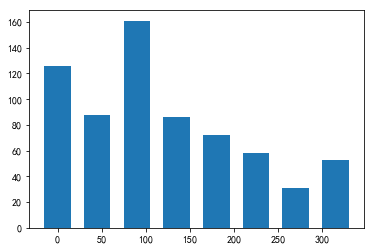

In [169]:
plt.bar(x[:-1],y,width=30)

In [174]:
x = np.arange(0,2*np.pi,np.pi/4)
x

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

<BarContainer object of 8 artists>

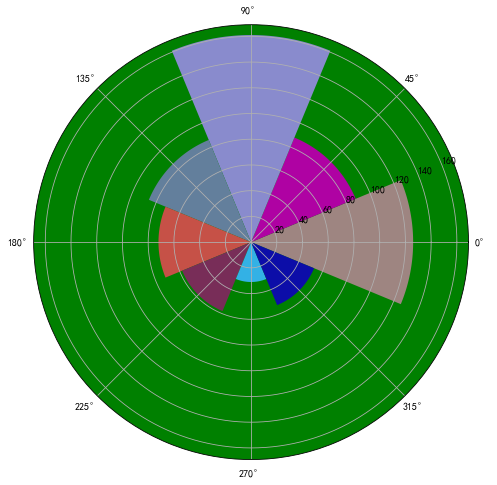

In [178]:
plt.figure(figsize=(10,8))
plt.subplot(projection='polar',facecolor='g')
plt.bar(x,y,width=np.pi/4,color=np.random.rand(8,3))

In [159]:
df['city'].unique()

array(['Asti', 'Bologna', 'Cesena', 'Faenza', 'Ferrara', 'Mantova',
       'Milano', 'Piacenza', 'Ravenna', 'Torino'], dtype=object)

计算米兰各个方向上的风速

In [218]:
city = df['city']
cond = city == 'Milano'
M_wind_deg=df[cond][['wind_deg']]
M_wind_speed=df[cond][['wind_speed']]

In [220]:
df_M = pd.concat([M_wind_deg,M_wind_speed],axis=1)
df_M.head(5)

wind_deg  wind_speed
0     100.0         2.1
1       0.0         2.6
2     140.0         2.6
3       0.0         2.1
4      80.0         3.1

In [255]:
w_speed = df_M.groupby('wind_deg').mean()
w_speed

wind_speed
wind_deg            
0.0         1.406667
10.0        3.050000
20.0        2.100000
30.0        3.600000
40.0        2.600000
50.0        2.600000
60.0        1.500000
70.0        1.866667
80.0        2.575000
90.0        2.400000
100.0       2.600000
110.0       1.500000
120.0       4.600000
130.0       3.600000
140.0       2.325000
150.0       4.100000
160.0       2.100000
200.0       1.950000
210.0       2.400000
220.0       2.600000
230.0       2.100000
250.0       2.600000
270.0       2.600000
310.0       1.500000
320.0       2.100000
350.0       2.100000

将各个方向的风速保存在列表中

In [271]:
speed = np.array(w_speed['wind_speed'])
deg = np.array(w_speed.index)
display(deg,speed)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 200., 210., 220., 230., 250.,
       270., 310., 320., 350.])

array([1.40666667, 3.05      , 2.1       , 3.6       , 2.6       ,
       2.6       , 1.5       , 1.86666667, 2.575     , 2.4       ,
       2.6       , 1.5       , 4.6       , 3.6       , 2.325     ,
       4.1       , 2.1       , 1.95      , 2.4       , 2.6       ,
       2.1       , 2.6       , 2.6       , 1.5       , 2.1       ,
       2.1       ])

In [272]:
deg = np.arange(0,2*np.pi,np.pi/13)
deg

array([0.        , 0.24166097, 0.48332195, 0.72498292, 0.96664389,
       1.20830487, 1.44996584, 1.69162681, 1.93328779, 2.17494876,
       2.41660973, 2.65827071, 2.89993168, 3.14159265, 3.38325363,
       3.6249146 , 3.86657557, 4.10823655, 4.34989752, 4.59155849,
       4.83321947, 5.07488044, 5.31654141, 5.55820239, 5.79986336,
       6.04152433])

画出各个方向的风速

<BarContainer object of 26 artists>

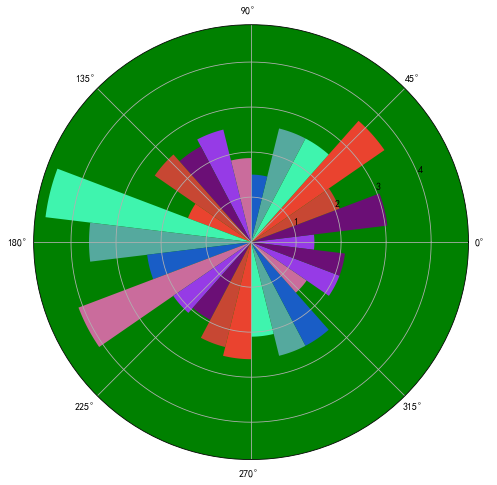

In [273]:
plt.figure(figsize=(10,8))
plt.subplot(projection='polar',facecolor='g')
plt.bar(deg,speed,width=np.pi/13,color=np.random.rand(8,3))

将上面步骤写成函数